# **Corpus: CEASE, a Corpus of Emotion Annotated Suicide notes in English**
Soumitra Ghosh, Asif Ekbal, Pushpak Bhattacharyya; 2020

[Access link](https://aclanthology.org/2020.lrec-1.201/)



*   Corpus de cartas de suicídio em inglês classificadas por emoções (já disponível dessa forma)
*   Conjunto de 205 cartas
*   Emoções marcadas: *forgiveness, happiness_peacefulness, love, pride, hopefulness, thankfulness, blame, anger, fear, abuse, sorrow, hopelessness, guilt, information, instructions*

# Trabalhando com o corpus inteiro

In [ ]:
#instalando o nltk
import nltk
nltk.download('all')
# from nltk.book import *

In [ ]:
# pacotes para a word cloud
import os

from os import path
from wordcloud import WordCloud

In [ ]:
# pacote mostrar a WC
import matplotlib.pyplot as plt

In [ ]:
# pacotes para stemmização
# from nltk.stem.snowball import SnowballStemmer

# stemmer = SnowballStemmer(language='english')

In [ ]:
# pacote para exportar df
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pasta dos textos
path = "/content/drive/MyDrive/Outros/Corpora/CEASE_Corpus/data/"
path2 = "/content/drive/MyDrive/Outros/Corpora/CEASE_Corpus/data/cartas/"

In [ ]:
#ABRE O CORPUS ORIGINAL 
# letter_corpus é um arquivo com todas as cartas 
with open(path + 'letters_corpus.txt', 'r', encoding='utf-8') as f:
    
    #LÊ O TEXTO
    text = f.read()

#print(text)

In [ ]:
# tirando as marcas de pontuação
import re
letters = re.sub('\.', ' ', text)
letters = re.sub('!', ' ', letters)
letters = re.sub(',', ' ', letters)
letters = re.sub('\?', ' ', letters)
letters = re.sub('-', ' ', letters)

# # fazendo mais edições na grafia
letters = re.sub("'ll", ' will', letters)
letters = re.sub("wont", 'will not', letters)
letters = re.sub("won't", 'will not', letters)
letters = re.sub('name', 'name', letters)
letters = re.sub(' +', ' ', letters)
letters = " ".join([k.lower() if k != 'NAME' else k for k in letters.split()])
# print(letters)

In [ ]:
import nltk
nltk.download('punkt')

# tokenizar as palavras
words_letters = nltk.word_tokenize(letters)
words_list = nltk.Text(words_letters)

# conhecendo o corpus
print('O número de tokens no corpus é ' + str(len(words_letters)))
print('O número de types no corpus é ' + str(len(set(words_letters))))
ratio1 = len(set(words_letters)) / len(words_letters) 
ratio = ratio1 * 100
print('A razão type-token no corpus é ' + str(ratio))

O número de tokens no corpus é 31274
O número de types no corpus é 3975
A razão type-token no corpus é 12.710238536803734


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# distribuição da frequência
from nltk import FreqDist
freq = FreqDist(words_list)
freq.most_common(50)

[('i', 1966),
 ('to', 1020),
 ('the', 994),
 ('and', 787),
 ('you', 631),
 ('my', 612),
 ('of', 566),
 ('a', 557),
 ('not', 552),
 ('have', 468),
 ('is', 464),
 ('me', 432),
 ('that', 422),
 ('it', 397),
 ('in', 373),
 ('am', 370),
 ('for', 335),
 ('this', 291),
 ('be', 263),
 ('do', 256),
 ('will', 223),
 ('NAME', 213),
 ('but', 197),
 ('all', 194),
 ('so', 188),
 ('was', 184),
 ('can', 166),
 ('with', 156),
 ('life', 152),
 ('no', 142),
 ('on', 141),
 ('as', 141),
 ('love', 128),
 ('they', 127),
 ('are', 125),
 ('at', 116),
 ('would', 115),
 ('or', 111),
 ('know', 110),
 ('if', 108),
 ('like', 107),
 ('from', 96),
 ('we', 96),
 ('what', 95),
 ('had', 94),
 ('people', 92),
 ('been', 90),
 ('your', 88),
 ('one', 88),
 ('any', 88)]

In [ ]:
# fazendo a stemmização do corpus
# for token in words_letters:
    # stemmer1 = stemmer.stem(token)
    # print(token, '=>', stemmer1)

In [ ]:
# gerar uma word cloud
wordcloud = WordCloud(max_font_size=50, max_words=20, background_color="white", colormap='inferno_r').generate(letters)

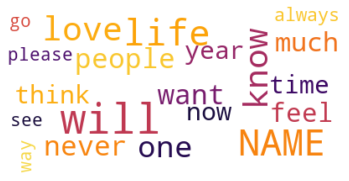

In [ ]:
# mostrar a wc gerada
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# store to file
plt.savefig("wordcloud_letters.png", format="png")
plt.show()

In [ ]:
# colocar uma fonte maior (max_font_size)
# wordcloud = WordCloud(width=4000, height=3000, background_color='white', 
#                       colormap = 'magma', max_font_size=980).generate(letters)
# plt.figure()
# plt.imshow(wordcloud, interpolation="bilinear")
# plt.axis("off")
# plt.show()

# Name está muito frequente, porque era onde os autores colocaram nome deles
# mesmos ou de alguém próximo. Logo, por motivos éticos os pesquisadores resolveram
# substituir esse tipo de informação pela tag NAME

# O NAME está aparecendo 3 vezes e não consegui entender o porquê

In [ ]:
# exportando a WC
# wordcloud.to_file('most_freq_w_letters.png')

In [ ]:
# in case I wanted a masked word cloud:
# https://amueller.github.io/word_cloud/auto_examples/masked.html

Duas palavras que ficaram grandes na Word cloud e que chamaram minha atenção foram: ***'life'*** e ***'will'***, porque, considerando o tipo de texto do corpus, os autores dos textos estão literalmente terminando sua vida.

1. **Life** = como já mencionado, os autores estão finalizando sua vida, logo é interessante ver como essa palavra está sendo usada: para reclamar da vida? para encorajar os outros a aproveitar a vida? fazer uma narrativa de vida?

2. **Will** = neste caso, resta saber se é o verbo auxiliar de futuro simples do inglês (por ex. *'I will go out tonight'*), se é o substantivo 'vontade' (*'My will is for you to be happy'*) ou o verbo 'ter vontade de' (*'I'm willing to take the risk'*). Eu estaria mais interessado nas ocorrências como verbo marcador de futuro, pois, seria interessante ver se os autores estão fazendo predições sobre eles mesmos (ainda que eles não estaram entre os conhecidos), sobre a família e amigos ou sobre outro assunto, ou até mesmo uma promessa.



> *As frases de exemplo foram feitas por mim. Logo abaixo veremos como essas palavras aparecem no corpus.*



In [ ]:
words_list.collocations()

fuck fuck; fag boy; NAME NAME; commit suicide; anyone else; take care;
united states; good bye; name removed; first time; last wish; nag nag;
justice system; good luck; heika banzai; tenno heika; god forgive; may
concern; phone calls; sweet cesspool


In [ ]:
# linhas de concordância de allness terms
allness = ['everyone', 'every day', 'everybody', 'nobody', 'no one', 'never', 'always', 
           'completly', 'forever', 'perfectly', 'all']
for term in allness:
  print(term + " "+ str(letters.count(term)))
  ratioAll = letters.count(term) / len(words_letters)
  print(term + " "+str( ratioAll))

everyone 33
everyone 0.001055189614376159
every day 3
every day 9.592632857965082e-05
everybody 13
everybody 0.00041568075717848693
nobody 7
nobody 0.00022382810001918526
no one 18
no one 0.0005755579714779049
never 89
never 0.0028458144145296414
always 67
always 0.002142354671612202
completly 0
completly 0.0
forever 13
forever 0.00041568075717848693
perfectly 0
perfectly 0.0
all 365
all 0.011671036643857517


In [ ]:
# linhas de concordância de 'life'
life_concordance = words_list.concordance('all')

Displaying 25 of 194 matches:
after all i was stupid to be used because i wor
ears has made work a torture to do at all i hve receved hate letters telling me
a fuss about the entrance examination all the time therefore i die although i w
 they do not fucking know me they are all assholes i hate everyone know i am a 
ucking know that for sure they should all be in prison they are horrible i hate
and a rotten i wish i were never born all you want in life is partying your wom
a great love for me and our baby when all the time you did not want us i see no
e jieitai is unconstitutional you are all unconstitutional do not you understan
gency of our government have dried up all sources of credit for us we die becau
ause you are not worth any emotion at all it is what you cost me that hurts and
d my birthday dinner when i came back all i wanted was you and my happiness you
ependence day from life be happy that all the bad shit i feel is goint fo be ov
ppy now i am happy now now that it is all 

In [ ]:
# linhas de concordância de 'life'
life_concordance = words_list.concordance('life')

In [ ]:
# linhas de concordância de 'life'
would_concordance = words_list.concordance('would', lines = 115)

Displaying 115 of 115 matches:
hat i have pondered it and decided i would hurt them less dead than alive dear 
 the time therefore i die although i would like to enter a firstrate university
u are such an ugly fag boy no faggot would even fuck an uglyfagg boiy like you 
 i eased into coming out as trans it would be less of a shock i am leaving you 
es how you with your generous nature would have laughed exulted if you had seen
 of credit for us we die because you would not let us live in peace it has made
lled me i do not want you to think i would kill myself over you because you are
love NAME smiley face inside the o i would have been lucky to make it to the fr
re like life in the twilight zone it would not surprise me to wake up this minu
d i been encouraged nothing but good would have come from me because when encou
coming i can not go on i am afraid i would break down i need to go to a dr but 
t i am afraid i was afraid that they would get down on me but they did not it i
 became i

In [ ]:
# linhas de concordância de 'will'
will_concordance = words_list.concordance('will')

Displaying 25 of 223 matches:
ny eternal torment worse than mine i will have to be shown i do not know if it
fault great anxiety the constitution will remain forever you are finished the 
turely should never have been born i will go through with my heels at your hun
ven fuck an uglyfagg boiy like you i will not be the faggot the queer the fag 
uck fuck god damn assholes asshole i will stick it up his ass asshole can fagg
s in this sweet cesspool their lives will be tough enough and i have become a 
o you but at least an honest one who will mean what she says i am leaving you 
constitutional do not you understand will any of you rise with me you will not
and will any of you rise with me you will not rise the irs and its liens which
er finally forever they do not win i will win because i will be happy and they
they do not win i will win because i will be happy and they are horrible peopl
 going to make it but never forget i will whoop your ass if you get too crazy 
erves get worse and i 

In [ ]:
# linhas de concordância de 'not'
not_concordance = words_list.concordance('not')

In [ ]:
# linhas de concordância de 'no'
no_concordance = words_list.concordance('no', lines = 142)

As duas palavras de negação (NOT e NO) juntas totalizaram 694 ocorrências (2,21% do total do corpus).

Como esperado, NOT foi mais usado como a partícula de negação com verbos auxiliares, como em *do not* e *will not*. Enquanto NO foi mais usado como um intensificador, como em casos de *there's no way*; *I see no good in...*; *there is no further point in continuing my life*. NO está atuando como um advérbio de negação, porém esse uso vai além disso, ele intensifica o valor negativo e depreciativo da sentença (ou da collocation)

In [ ]:
# anotação POS com NLTK
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(words_letters)

# Ao olhar a classificação final, percebi que o pronome "I" estava 
# marcado como VB (verbo), por isso tentei usar outro anotador

In [ ]:
# fazendo o POS tagging com spacy
#print(texts_str)
import spacy
nlp = spacy.load("en_core_web_sm")
# words = []
# noun_chunks = []
# entities = []

doc = nlp(letters)
#transformando as tags + palavras em um dataframe
spacy_tag = [(word, word.lemma_, word.tag_, word.pos_, word.dep_, ) for word in doc]
text_df = pd.DataFrame(spacy_tag)
text_df.columns = ['word', 'lemma', 'tags', 'pos', 'dep']
# words.extend([w for w in list(doc) if w.is_alpha])

In [ ]:
print(text_df['pos'].value_counts())

PRON     5917
NOUN     4927
VERB     4734
AUX      2943
ADP      2785
DET      2183
ADJ      1994
ADV      1710
PART     1304
CCONJ    1113
SCONJ     923
PROPN     364
NUM       251
INTJ      143
X          11
Name: pos, dtype: int64


In [ ]:
df

In [ ]:
print(df.head())

In [ ]:
# buscando pelas linhas com a palavra 'will'
will_df = df.loc[df['word'] == 'will']

# saber quais tags estão relacionadas a 'will'
print(will_df['upos'].value_counts())

# DF apenas com will como AUX
will_aux_df = will_df.loc[will_df['upos'] == 'AUX'] #df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
print(will_aux_df.head())

In [ ]:
# buscando pelas linhas com a palavra 'life'
life_df = df.loc[df['word'] == 'life']

# saber quais tags estão relacionadas a 'life'
life_df['upos'].value_counts()

In [ ]:
# buscando pelas linhas com advérbios
ADV_df = df.loc[df['upos'] == 'ADV']

# Nesta parte, iremos comparar algumas cartas no corpus

*OBS.: o corpus está dividido por sentimento. Por exemplo, todas as cartas classificadas como "love" estão no mesmo arquivo .txt*

In [ ]:
# abrindo as cartas de dois sentimentos diferentes

## abrindo as cartas de hopefulness
with open(path2 + 'hopefulness_alltext.txt', 'r', encoding='utf-8') as hf:
    
    #LÊ O TEXTO
    hopefulness = hf.read()

# print(hopefulness)

In [ ]:
## abrindo as cartas de hopelessness
with open(path2 + 'hopelessness_alltext.txt', 'r', encoding='utf-8') as hn:
    
    #LÊ O TEXTO
    hopelessness = hn.read()

# print(hopelessness)

### **Explorando a carta de HOPEFULNESS**

In [ ]:
# tirando as marcas de pontuação
# dessa vez quis explorar um método diferente (antes fiz um a um
# agora estou montando uma função)
import re
def process_text(raw_txt):
  raw_txt = re.sub('\.', ' ', raw_txt) 
  raw_txt = re.sub('!', ' ', raw_txt)
  raw_txt = re.sub(',', ' ', raw_txt)
  raw_txt = re.sub('\?', ' ', raw_txt)
  raw_txt = re.sub("'ll", ' will', raw_txt)
  raw_txt = re.sub("wont", 'will not', raw_txt)
  raw_txt = re.sub("won't", 'will not', raw_txt)
  raw_txt = re.sub('NAME', 'XXX', raw_txt)
  raw_txt = re.sub('  ', ' ', raw_txt)
  raw_txt = raw_txt.lower()
  # raw_txt = salva em txt
  return raw_txt

In [ ]:
hopefulness_text = process_text(hopefulness)

In [ ]:
import nltk
nltk.download('punkt')

# tokenizar as palavras
words_hopefulness = nltk.word_tokenize(hopefulness_text)
hopefulness_list = nltk.Text(words_hopefulness)

# conhecendo o corpus
print('O número de tokens nas cartas de HOPEFULNESS é ' + str(len(words_hopefulness)))
print('O número de types nas cartas de HOPEFULNESS é ' + str(len(set(words_hopefulness))))
ratio1 = len(set(words_hopefulness)) / len(words_hopefulness) 
ratio = ratio1 * 100
print('A razão type-token nas cartas de HOPEFULNESS é ' + str(ratio))

O número de tokens nas cartas de HOPEFULNESS é 2306
O número de types nas cartas de HOPEFULNESS é 619
A razão type-token nas cartas de HOPEFULNESS é 26.843018213356462


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **Explorando a carta de HOPELESSNESS**

In [ ]:
hopelessness_text = process_text(hopelessness)

In [ ]:
# tokenizar as palavras
words_hopelessness = nltk.word_tokenize(hopelessness_text)
hopelessness_list = nltk.Text(words_hopelessness)

# conhecendo o corpus
print('O número de tokens nas cartas de HOPELESSNESS é ' + str(len(words_hopelessness)))
print('O número de types nas cartas de HOPELESSNESS é ' + str(len(set(words_hopelessness))))
ratio1 = len(set(words_hopelessness)) / len(words_hopelessness) 
ratio = ratio1 * 100
print('A razão type-token nas cartas de HOPELESSNESS é ' + str(ratio))

O número de tokens nas cartas de HOPELESSNESS é 1127
O número de types nas cartas de HOPELESSNESS é 388
A razão type-token nas cartas de HOPELESSNESS é 34.42768411712511


# Comparando as cartas HOPEFULNESS e HOPELESSNESS

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
 
stop_words = set(stopwords.words('english'))


#filtered hopeful
 
filtered_hopeful = [w for w in words_hopefulness if not w.lower() in stop_words]
 
filtered_hopeful = []
 
for w in words_hopefulness:
    if w not in stop_words:
        filtered_hopeful.append(w)

filtered_hopefulness_list = nltk.Text(filtered_hopeful)

#filtered hopeless
filtered_hopeless = [w for w in words_hopelessness if not w.lower() in stop_words]
 
filtered_hopeless = []
 
for w in words_hopelessness:
    if w not in stop_words:
        filtered_hopeless.append(w)

filtered_hopelessness_list = nltk.Text(filtered_hopeless)

In [ ]:
# distribuição da frequência
from nltk import FreqDist
#hopeful list
freq_hopeful = FreqDist(filtered_hopefulness_list)
freq_hopeful50 = freq_hopeful.most_common(50)

#hopeless list
freq_hopeless = FreqDist(filtered_hopelessness_list)
freq_hopeless50 = freq_hopeless.most_common(50)

In [ ]:
hopes_freq_dist = pd.DataFrame({'hopelessness freq_dist':freq_hopeless50,
                   'hopefulness freq_dist':freq_hopeful50})
hopes_freq_dist.head(10)

,hopelessness freq_dist,hopefulness freq_dist
0,"(tired, 15)","(hope, 32)"
1,"(life, 13)","(wish, 14)"
2,"(hope, 9)","(peace, 14)"
3,"(one, 8)","(xxx, 13)"
4,"(know, 6)","(god, 13)"
5,"(feel, 5)","(may, 11)"
6,"(much, 5)","(know, 10)"
7,"(done, 5)","(see, 10)"
8,"(like, 5)","(love, 9)"
9,"(left, 5)","(please, 9)"


In [ ]:
# fazer match entre as duas cartas para saber o quanto elas se diferenciam
# com Difflib
from difflib import SequenceMatcher

sequence = SequenceMatcher(None, hopefulness, hopelessness)

#  SequenceMatcher documentation = The basic idea is to find the longest 
#  contiguous matching subsequence (LCS) that contains no “junk” elements. 
#  This does not yield minimal edit sequences, but does tend to yield matches 
#  that “look right” to people.

In [ ]:
ratio_a = sequence.ratio()
final_ratio = ratio_a * 100
print(final_ratio)

0.7625975244911128


A razão deu **0,76% de match** entre as cartas, o que de certa forma era previsto, já que, pela anotação feita, elas sinalizam emoções opostas

In [ ]:
# convertendo cartas HOPEFUL E HOPELESS em TF-IDF e usando cosine similiarity

from sklearn.feature_extraction.text import TfidfVectorizer

documents1 = [hopefulness_text, hopelessness_text]
tfidf1 = TfidfVectorizer().fit_transform(documents1)

# no need to normalize, since Vectorizer will return normalized tf-idf
hopeful_less_similarity = tfidf1 * tfidf1.T
print(hopeful_less_similarity)

  (0, 1)	0.6953104008759186
  (0, 0)	1.0
  (1, 0)	0.6953104008759186
  (1, 1)	1.0000000000000004


In [ ]:
hopeful_less_similarity.toarray() 

array([[1.       , 0.6953104],
       [0.6953104, 1.       ]])

### Analisando a complexidade gramatical das cartas de HOPEFULNESS e HOPELESSNESS

In [ ]:
# POS tagging em hopefulness
hopeful_postag = nlp(hopefulness_text)

In [ ]:
# POS tagging em hopefulness
hopeless_postag = nlp(hopelessness_text)
#print(hopeless_postag)

In [ ]:
# HOPEFULNESS
# criando listas para fazer a conversão em dataframe
words1 = []
upos1 = []
xpos1 = []
feats1 = []


for sent in hopeful_postag.sentences:
    for word in sent.words:
        words1.append(word.text) 
        upos1.append(word.upos)
        xpos1.append(word.xpos)
        if word.feats:
            feats1.append(word.feats)
        else:
            feats1.append('_')

# colocando os resultados em um df
df_hopeful = pd.DataFrame({'word':words1,
                   'upos':upos1,
                   'xpos':xpos1})

# contando itens únicos na coluna de UPOS
hopeful_upos_counts = df_hopeful["upos"].value_counts()
print(hopeful_upos_counts)

In [ ]:
# # HOPELESSNESS
# # criando listas para fazer a conversão em dataframe
words2 = []
upos2 = []
xpos2 = []
feats2 = []


for sent in hopeless_postag.sentences:
    for word in sent.words:
        words2.append(word.text) 
        upos2.append(word.upos)
        xpos2.append(word.xpos)
        if word.feats:
            feats2.append(word.feats)
        else:
            feats2.append('_')

# colocando os resultados em um df
df_hopeless = pd.DataFrame({'word':words2,
                   'upos':upos2,
                   'xpos':xpos2})

# contando itens únicos na coluna de UPOS
hopeless_upos_counts = df_hopeless["upos"].value_counts()
print(hopeless_upos_counts)

In [ ]:
# # contando com a frequência normalizada
# # HOPEFULNESS
hopeful_upos_norm = df_hopeful["upos"].value_counts(normalize = True)
print(hopeful_upos_norm)

# # HOPELESSNESS
hopeful_upos_norm = df_hopeless["upos"].value_counts(normalize = True)
print(hopeless_upos_counts)

# **Comparando cartas de emoções "parecidas"**

In [ ]:
## abrindo as cartas de happiness_peacefulness
with open(path2 + 'happiness_peacefulness_alltext.txt', 'r', encoding='utf-8') as hp:
    
    #LÊ O TEXTO
    happiness = hp.read()

# print(happiness)

In [ ]:
# happiness processado
happiness_text = process_text(happiness)

In [ ]:
# tokenizar as palavras
words_happy = nltk.word_tokenize(happiness_text)
happy_list = nltk.Text(words_happy)

# conhecendo o corpus
print('O número de tokens nas cartas de HAPPINESS é ' + str(len(words_happy)))
print('O número de types nas cartas de HAPPINESS é ' + str(len(set(words_happy))))
ratio1 = len(set(words_happy)) / len(words_happy) 
ratio = ratio1 * 100
print('A razão type-token nas cartas de HAPPINESS é ' + str(ratio))

O número de tokens nas cartas de HAPPINESS é 364
O número de types nas cartas de HAPPINESS é 164
A razão type-token nas cartas de HAPPINESS é 45.05494505494506


In [ ]:
## abrindo as cartas de love
with open(path2 + 'love_alltext.txt', 'r', encoding='utf-8') as lo:
    
    #LÊ O TEXTO
    love = lo.read()

# print(love)


In [ ]:
# love processado
love_text = process_text(love)

In [ ]:
# tokenizar as palavras
words_love = nltk.word_tokenize(love_text)
love_list = nltk.Text(words_love)

# conhecendo o corpus
print('O número de tokens nas cartas de HAPPINESS é ' + str(len(words_love)))
print('O número de types nas cartas de HAPPINESS é ' + str(len(set(words_love))))
ratio1 = len(set(words_love)) / len(words_love) 
ratio = ratio1 * 100
print('A razão type-token nas cartas de HAPPINESS é ' + str(ratio))

O número de tokens nas cartas de HAPPINESS é 834
O número de types nas cartas de HAPPINESS é 274
A razão type-token nas cartas de HAPPINESS é 32.853717026378895


In [ ]:
# fazer match entre as duas cartas para saber o quanto elas se diferenciam
# com Difflib
from difflib import SequenceMatcher

sequence1 = SequenceMatcher(None, love_text, happiness_text)

In [ ]:
ratio1 = sequence1.ratio()
final_ratio1 = ratio1 * 100
print(final_ratio1)

0.5605184795936241


**Cosine similiarity:**

The resulting similarity ranges from ***−1 meaning exactly opposite, to 1 meaning exactly the same, with 0 indicating orthogonality or decorrelation***, while in-between values indicate intermediate similarity or dissimilarity.

For text matching, the attribute vectors A and B are usually the term frequency vectors of the documents. Cosine similarity can be seen as a method of normalizing document length during comparison.

Fonte: https://en.wikipedia.org/wiki/Cosine_similarity#Definition

In [ ]:
# convertendo cartas HOPEFUL E HOPELESS em TF-IDF e usando cosine similiarity

from sklearn.feature_extraction.text import TfidfVectorizer

documents2 = [love_text, happiness_text]
tfidf2 = TfidfVectorizer().fit_transform(documents2)

# no need to normalize, since Vectorizer will return normalized tf-idf
love_happy_similarity = tfidf2 * tfidf2.T
print(love_happy_similarity)

  (0, 1)	0.4411441923040335
  (0, 0)	1.0000000000000004
  (1, 0)	0.4411441923040335
  (1, 1)	1.0000000000000007


In [ ]:
love_happy_similarity.toarray()

array([[1.        , 0.44114419],
       [0.44114419, 1.        ]])

Como pode ser visto nas últimas células de código, as cartas de emoções opostas (hopelessness e hopefulness) são mais parecidas que as cartas de emoções semelhantes (love e happiness). A hipótese inicial era que as cartas de hope-fulness e -lessness fossem bem distintas e as de love e happiness fossem muito parecidas. 

A partir dos indíces de cosseno mostrados, podemos inferir que há temas e colocações semelhantes nas cartas de hopefulness e hopelessness. Enquanto nas cartas de love e happiness, os temas e colocações são menos uniformes entre si.